In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('Tweets.csv')

In [3]:
df.shape

(27481, 4)

In [4]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [5]:
df['sentiment'].value_counts()

sentiment
neutral     11118
positive     8582
negative     7781
Name: count, dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isna().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df["text"] = df["text"].astype(str).str.strip()

In [10]:
# Normalize quotes/backticks and whitespace
def normalize(s):
    s = s.replace("`", "'")
    s = re.sub(r"\s+", " ", s)
    return s.strip()

In [11]:
label_map = {"negative": 0, "neutral": 1, "positive": 2}
df["label"] = df["sentiment"].map(label_map)

In [12]:
X = df["text"]
y = df["label"]

In [13]:
vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.95,
    lowercase=True,
    strip_accents="unicode"
)

In [19]:
X_vectorized = vectorizer.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, stratify=y, random_state=42)

SVC()
67
              precision    recall  f1-score   support

           0       0.77      0.50      0.61      2334
           1       0.57      0.83      0.68      3335
           2       0.83      0.61      0.70      2575

    accuracy                           0.67      8244
   macro avg       0.72      0.65      0.66      8244
weighted avg       0.71      0.67      0.67      8244



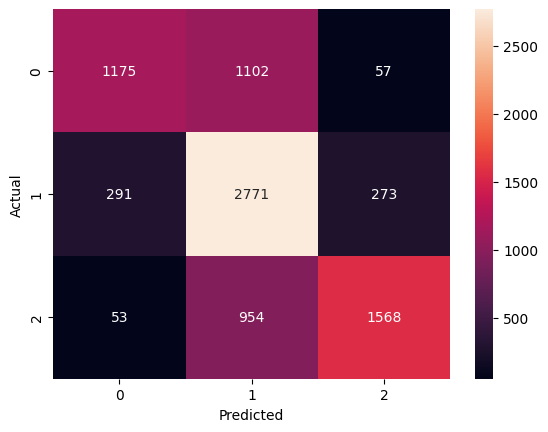

DecisionTreeClassifier()
61
              precision    recall  f1-score   support

           0       0.59      0.56      0.57      2334
           1       0.58      0.61      0.60      3335
           2       0.67      0.65      0.66      2575

    accuracy                           0.61      8244
   macro avg       0.61      0.61      0.61      8244
weighted avg       0.61      0.61      0.61      8244



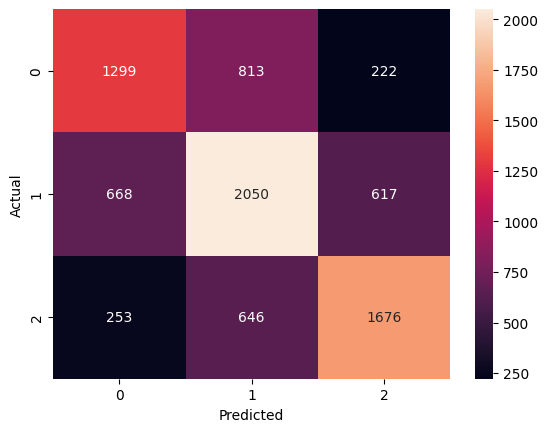

MultinomialNB()
62
              precision    recall  f1-score   support

           0       0.79      0.38      0.52      2334
           1       0.53      0.85      0.65      3335
           2       0.80      0.53      0.64      2575

    accuracy                           0.62      8244
   macro avg       0.71      0.59      0.60      8244
weighted avg       0.69      0.62      0.61      8244



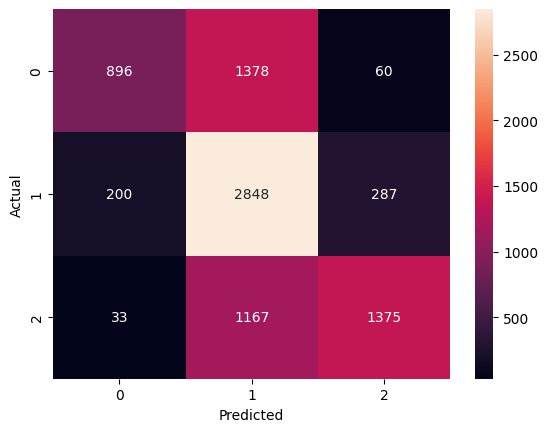

GradientBoostingClassifier()
64
              precision    recall  f1-score   support

           0       0.77      0.40      0.53      2334
           1       0.55      0.85      0.67      3335
           2       0.80      0.59      0.68      2575

    accuracy                           0.64      8244
   macro avg       0.71      0.61      0.62      8244
weighted avg       0.69      0.64      0.63      8244



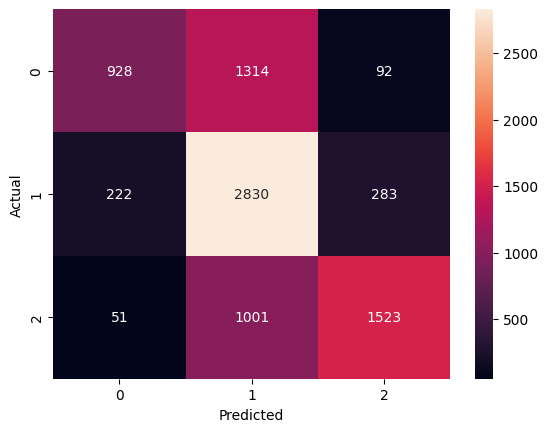

KNeighborsClassifier()
42
              precision    recall  f1-score   support

           0       0.36      0.17      0.23      2334
           1       0.42      0.87      0.56      3335
           2       0.82      0.07      0.13      2575

    accuracy                           0.42      8244
   macro avg       0.53      0.37      0.31      8244
weighted avg       0.53      0.42      0.34      8244



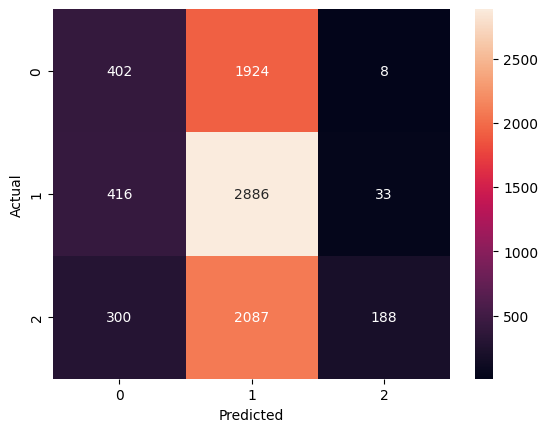

RandomForestClassifier()
67
              precision    recall  f1-score   support

           0       0.76      0.49      0.59      2334
           1       0.58      0.81      0.68      3335
           2       0.80      0.66      0.72      2575

    accuracy                           0.67      8244
   macro avg       0.71      0.65      0.66      8244
weighted avg       0.70      0.67      0.67      8244



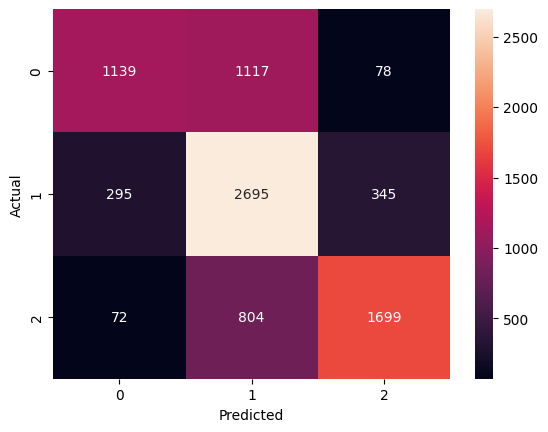

AttributeError: 'csr_matrix' object has no attribute '_validate_params'

In [21]:
models={KNeighborsClassifier(),LinearSVC, SVC(), DecisionTreeClassifier(), MultinomialNB(), RandomForestClassifier(), GradientBoostingClassifier()}
for model in models:
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    print(model)
    print(round(accuracy_score(y_test, y_pred)*100))
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    

In [22]:
best_model = RandomForestClassifier()
scores = cross_val_score(best_model, X_vectorized, y, cv=5)

In [23]:
print("Cross-Validation R² Scores:", scores)
print("Mean R² Score:", np.mean(scores))
print("Standard Deviation:", np.std(scores))

Cross-Validation R² Scores: [0.67194323 0.67267103 0.68395197 0.67194323 0.68049491]
Mean R² Score: 0.6762008733624454
Standard Deviation: 0.005044460975593415


In [ ]:
Randomizedsearch = Randomizedsearch()